Saisir le nom du fichier sans l'extension (.csv)Terre


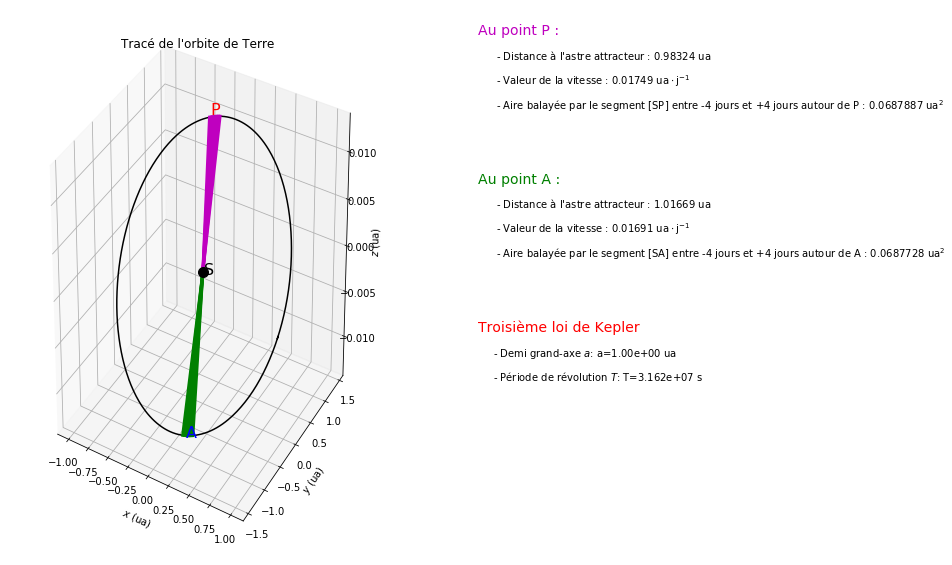

In [2]:
%matplotlib qt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



################################################################################
#Fonctions de calcul d'aires
################################################################################

def calcul_aire(J, ID_centre) :
    '''
    Cette fonction calcule l'aire en faisant le calcul de la surface d'un triangle
    considéré comme rectangle de hauteur (Soleil-Planète) et de base (v(jour)*t)
    '''
    Jour= ID_centre-J
    aire=0
    for j in range (0,2*J) :
        aire= aire+ M[Jour+j]*V[Jour+j]/2
    return(aire)


def calcul_aire2(J,ID_centre) :
    '''
    Cette fonction calcule l'aire en faisant le calcul de la surface d'un triangle
    Soleil-Position J-PositionJ+1 à l'aide du produit vectoriel SP(j)^SP(j+1)
    '''
    Jour= ID_centre-J
    aire=0
    for j in range (0,2*J-1) :
        x,y,z=X[Jour+j], Y[Jour+j], Z[Jour+j]
        x1,y1,z1=X[Jour+j+1], Y[Jour+j+1], Z[Jour+j+1]
        surface_triangle=0.5*np.sqrt((y*z1-z*y1)**2+ (z*x1-x*z1)**2+(x*y1-y*x1)**2)
        aire= aire+ surface_triangle
    return(aire)

################################################################################
#Fonction pour tracer la surface parcoururue
################################################################################
def trace_parcourue(J,ID_point,couleur) :
    Jour=ID_point - J
    for j in range (0,2*J) :
        ax.plot([0,X[Jour+j]],[0,Y[Jour+j]],[0,Z[Jour+j]],color=couleur, linewidth = 3)
    return()
################################################################################
#LECTURE DU FICHIER
################################################################################
fname = input("Saisir le nom du fichier sans l'extension (.csv)")
#Lecture du fichier Mercure.csv
Data = pd.read_csv(fname+'.csv', sep=';', header=0)
#Modification de la ligne date du format objet vers le format datetime
Data['Date (undefined)'] = pd.to_datetime(Data['Date (undefined)'])
#Stocker les variable dans une matrice
# Position
X = Data['x (au)']
Y = Data['y (au)']
Z = Data['z (au)']
M = np.sqrt(X**2+Y**2+Z**2)
# Vitesse
Vx = Data['vx (au/d)']
Vy = Data['vy (au/d)']
Vz = Data['vz (au/d)']
V = np.sqrt(Vx**2+Vy**2+Vz**2)
#Calcul des points à l'aphélie et au périhélie
Perihelie = np.min(M)
Aphelie = np.max(M)
#Recupérer les index des points à l'aphélie et au périhélie
ID_Perihelie = np.where(M==Perihelie)[0][0]
ID_Aphelie = np.where(M==Aphelie)[0][0]


###############################################################################
#Tracé de la trajectoire
###############################################################################
fig=plt.figure(figsize=(16,10))
ax = fig.add_subplot(121, projection='3d')
#Tracer l'ellipse et ajout des légendes
ax.plot(X,Y,Z, color='k')
ax.text(X[ID_Aphelie]-0.01,Y[ID_Aphelie]-0.05,Z[ID_Aphelie],"A",fontsize = 16,color='b')
ax.text(X[ID_Perihelie]-0.05,Y[ID_Perihelie]+0.005,Z[ID_Perihelie],"P",fontsize = 16,color='r')
ax.scatter(0,0,0,color='k', s=100)
ax.text(0.03,-0.03,0,'S', fontsize = 16)

## Tracer les différentes zones balayées
J=4
trace_parcourue(J,ID_Perihelie,'m')
trace_parcourue(J,ID_Aphelie,'g')

#Paramètres figure
ax.axis('equal')
plt.grid(True)


#Légendes
plt.title("Tracé de l'orbite de " + str(fname))
ax.set_ylabel(r'$y$ (ua)')
ax.set_xlabel('$x$ (ua)')
ax.set_zlabel('$z$ (ua)')

####################################################################################
#Troisième loi de Kepler
####################################################################################

#Calcul du demi-grand axe
a=((M[ID_Aphelie]+M[ID_Perihelie])/2)

#Calcul de la période
ID_same = np.where(round(M[1:],3)==round(M[0],3))[0][-1]
T = Data['Date (undefined)'][ID_same+1] - Data['Date (undefined)'][0]
Ts = T.days*24*3600

ax1=fig.add_subplot(122,frameon=False)
plt.xlim(0,13)
plt.ylim(0,11)
plt.xticks([])
plt.yticks([])
ax1.text(0.5,10.5,"Au point P : ", color='m', fontsize=14)
ax1.text(1.,10," - Distance à l'astre attracteur : "+str(round(M[ID_Perihelie],5))+ " $\mathrm{ua}$")
ax1.text(1.,9.5," - Valeur de la vitesse : "+str(round(V[ID_Perihelie],5))+ " $\mathrm{ua\cdot j^{-1}}$")
ax1.text(1.,9," - Aire balayée par le segment [SP] entre "+ str(-J) +" jours et +" + str(+J) + " jours autour de P : "+str(round(calcul_aire(J,ID_Perihelie),7))+ " $\mathrm{ua^2}$")

ax1.text(0.5,7.5,"Au point A : ", color='g', fontsize=14)
ax1.text(1.,7," - Distance à l'astre attracteur : "+str(round(M[ID_Aphelie],5))+ " $\mathrm{ua}$")
ax1.text(1.,6.5," - Valeur de la vitesse : "+str(round(V[ID_Aphelie],5))+ " $\mathrm{ua\cdot j^{-1}}$")
ax1.text(1.,6," - Aire balayée par le segment [SA] entre "+ str(-J) +" jours et +" + str(+J) + " jours autour de A : "+str(round(calcul_aire(J,ID_Aphelie),7))+ " $\mathrm{ua^2}$")
plt.savefig('Kepler_'+(fname)+'.png')


ax1.text(0.5,4.5,"Troisième loi de Kepler ", color='r', fontsize=14)
ax1.text(1,4,"- Demi-grand axe $a$ : "+'$a$=%.2e'%(a)+" ua")
ax1.text(1,3.5,"- Période de révolution $T$ : "+'$T$=%.3e'%(Ts)+" s")
plt.show()
